# Try to write temperature-based potential evaporation (PET) model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('../data/hbv_s_data.csv', index_col=0, parse_dates=True)

[Source: Xu and Singh, 2001](http://folk.uio.no/chongyux/papers_SCI/HYP_5.pdf)

Romanenko (1961) derived an evaporation equation based on the relationship using
mean temperature and relative humidity:

$$ET = 0.0018(25 + T_a)^2(100-Rh)$$

where Ta is the mean air temperature (in °C), Rh is the mean monthly relative humidity, which is calculated
by:

$$Rh = \frac{e^o(T_d)}{e^o(T_a)}$$

in which e°(T) is the saturated vapour pressure calculated by (see Bosen, 1960):

$$ e^o(T) = 33.8679[(0.00738T + 0.8072)^8 - 0.000019|1.8T + 48| + 0.001316]  $$


In [49]:
evap_true = np.array([0.6,1.9,2.4,1.8,1.4,1.3,1.0,0.8,0.6,0.4,0.2,0.3])*1.2 #evapo for jan-dec

In [184]:
def romanenko(data):
    Ta = np.array([data.ix[data.index.month == x, 'Temp'].mean() for x in range(1, 13)])
    Td = 2
    
    def et(T):
        return 33.8679*( ((0.00738*T + 0.8072)**8) - 0.000019*(np.abs(1.8*T + 48)) + 0.001316)
    
    Rh = et(Td)*100/et(Ta)
    # best results with manual evap setup
    # Rh = np.array([60, 0, 0, 45, 70, 80, 85, 90, 90, 90, 90, 76])
    return (0.0018*((25+Ta)**2))*(100-Rh)/30

In [189]:
Ta = np.array([data.ix[data.index.month == x, 'Temp'].mean() for x in range(1, 13)])
Td = np.array([0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
et(Td)*100/et(Ta)

array([ 187.79586478,  168.25471015,  271.28553073,  193.89774973,
        136.50753758,   98.67181225,   71.76539194,   81.58690524,
        116.65200117,  175.93090031,  270.51995571,  393.32949076])

In [198]:
Ta

array([ -8.34792627,  -6.93535354,  -4.05207373,   0.49095238,
         5.4359447 ,  10.2       ,  15.06082949,  13.0797235 ,
         7.71952381,   1.84032258,  -4.01458333,  -8.8766129 ])

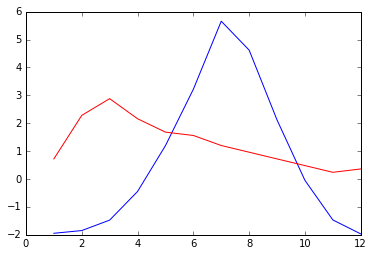

In [186]:
plt.plot(range(1,13), romanenko(data), 'b',
         range(1,13), evap_true, 'r')

Kharrufa method. Kharrufa (1985) derived an equation through correlation of ET/p and T in the form of:

$$ ET = 0.34pT_a^{1.3}$$

where ET is the Kharrufa potential evapotranspiration (in mm/month) and Ta and p have the same definitions
as given earlier.

In [210]:
def kharufa(data):
    Ta = np.array([data.ix[data.index.month == x, 'Temp'].mean() for x in range(1, 13)])
    p = 0.85
    return 0.34*p*(Ta**1.3)

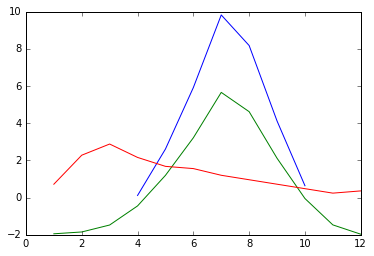

In [211]:
plt.plot(range(1,13), kharufa(data), 'b', 
         range(1,13), romanenko(data), 'g',
         range(1,13), evap_true, 'r')

In [60]:
print(kharufa(data))

[        nan         nan         nan  0.114617    2.61069046  5.91667979
  9.81977195  8.17477814  4.11875071  0.63864569         nan         nan]


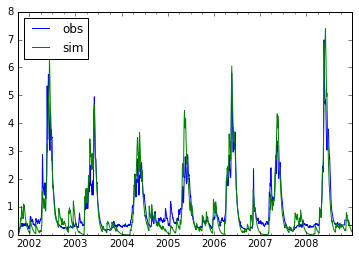

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../models/')
import hbv_s
swe_riv = pd.read_csv('../data/hbv_s_data.csv', index_col=0, parse_dates=True)
Qobs = swe_riv.Qobs
Qsim = hbv_s.simulation(swe_riv)
pd.DataFrame({'obs':Qobs, 'sim':Qsim}, index=swe_riv.index).plot()

In [119]:
swe_riv2 = swe_riv.drop('Evap', 1)

In [128]:
swe_riv2['Evap'] = swe_riv2.index.map(lambda x: romanenko(swe_riv2)[x.month-1])

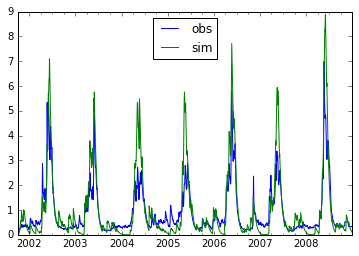

In [129]:
Qsim = hbv_s.simulation(swe_riv2)
pd.DataFrame({'obs':Qobs, 'sim':Qsim}, index=swe_riv2.index).plot()

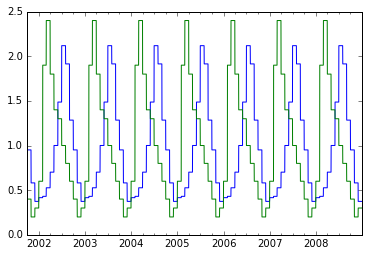

In [130]:
swe_riv2['Evap'].plot();
swe_riv['Evap'].plot()

In [199]:
evap_true

array([ 0.72,  2.28,  2.88,  2.16,  1.68,  1.56,  1.2 ,  0.96,  0.72,
        0.48,  0.24,  0.36])

In [201]:
a = np.array([0.6,1.9,2.4,1.8,1.4,1.3,1.0,0.8,0.6,0.4,0.2,0.3])

In [204]:
np.savetxt('../data/Evap_monthly_constants.txt', a)

In [205]:
np.loadtxt('../data/Evap_monthly_constants.txt')

array([ 0.6,  1.9,  2.4,  1.8,  1.4,  1.3,  1. ,  0.8,  0.6,  0.4,  0.2,
        0.3])

In [206]:
swe_riv2['Evap2'] = swe_riv2.index.map(lambda x: np.loadtxt('../data/Evap_monthly_constants.txt')[x.month-1])

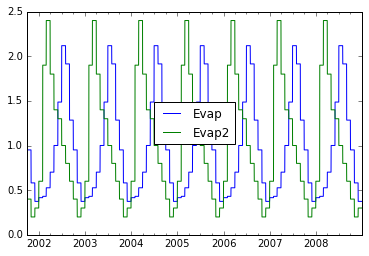

In [207]:
swe_riv2[['Evap', 'Evap2']].plot()